In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("X_train: ",X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train:  (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


In [6]:
print("Number of X_train: ",len(X_train))
print("Number of y_train", len(y_train))
print("Number of X_test", len(X_test))
print("Number of y_test", len(y_test))

Number of X_train:  60000
Number of y_train 60000
Number of X_test 10000
Number of y_test 10000


In [7]:
## Normalization

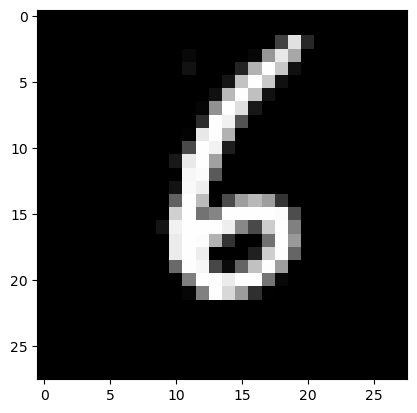

In [8]:
import random
idx = random.randint(0, len(X_train)-1)
image = X_train[idx,:]
plt.imshow(image, cmap='gray')

In [9]:
imagearray=np.array(image)
print(imagearray)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   66 225  39   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   8   0   0   0   0   7 151
  232 167   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18   0   0   0  37 178 254
  199  16   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  21 195 254 200
   16   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  16 185 254 192  17
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5 145 255 223  24   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  45 254 241  8

In [10]:
X_train, X_test = X_train/255.0, X_test/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [20]:
model  = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3,3)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((3,3)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),

])

C:\Users\ASO\Desktop\Project\Medical\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,914 (140.29 KB)

 Trainable params: 35,914 (140.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 29ms/step - accuracy: 0.9377 - loss: 0.2077 - val_accuracy: 0.9787 - val_loss: 0.0686
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9809 - loss: 0.0607 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9856 - val_loss: 0.0433
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9903 - val_loss: 0.0313
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9909 - loss: 0.0275 - val_accuracy: 0.9892 - val_loss: 0.0349


In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9892 - loss: 0.0349
Model Accuracy: 0.9891999959945679


In [25]:
model.save('mnist_model.h5')

In [26]:
model.save('mnist_model.keras')

In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained MNIST model
model = load_model('mnist_model.keras')

# Start webcam
cap = cv2.VideoCapture(0)
print("Press ESC to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break


    frame = cv2.flip(frame, 1)
    h, w, _ = frame.shape
    box_size = 200  # size of the square detection area
    x1 = (w // 2) - (box_size // 2)
    y1 = (h // 2) - (box_size // 2)
    x2 = x1 + box_size
    y2 = y1 + box_size

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    roi = frame[y1:y2, x1:x2]

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(gray)             # invert colors
    img = cv2.resize(img, (28, 28))         # resize to 28x28
    img = img.astype('float32') / 255.0     # normalize
    img_input = img.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(img_input, verbose=0)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Show prediction and confidence
    text = f"Digit: {predicted_label} ({confidence:.2f}%)"
    cv2.putText(frame, text, (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the live feed
    cv2.imshow("Real-Time Digit Recognition", frame)

    # Exit on ESC key
    key = cv2.waitKey(1)
    if key % 256 == 27:
        print("Exiting...")
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2'

In [6]:
import cv2


ModuleNotFoundError: No module named 'cv2'